<h1><center>Practice Case 3 |||| STATISTICS</center></h1>
<h1>Number 1</h1>

In [1]:
import pandas as pd #import library pandas
import seaborn as sns #import library seaborn
import numpy as np #import library numpy
import math #import library math
import matplotlib.pyplot as plt #import library matplotlib
datainsurance=pd.read_csv("insurance.csv")
datadict=pd.read_excel("data_dict_insurance.xlsx")

In [35]:
datainsurance.head() #knowing the first 5 data in dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h2>a. SHape of The Data</h2>

In [3]:
datainsurance.shape 

(1338, 7)

<h2>b. Type of The Data</h2>

In [4]:
datainsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<h2>c. Knowing The Missing Value</h2>

In [6]:
datainsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There is no missing value in each columns

<h2>d. Statistics Summary of The Data</h2>

In [34]:
datainsurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<h2>e. The Distribusi of Data</h2>
<h3>&</h3>
<h2>f. Skewness of Data</h2>

In [7]:
#fungsi distribusi dibawah ini dapat dari medium
def distribusi(kolom,data):
    skewness = data.loc[:,kolom].skew()
    print("Kolom {} skewnessnya sebesar {}.".format(kolom,skewness))
    sns.set(style="ticks")
    f, (ax_box,ax_hist) = plt.subplots(2,sharex=True, figsize=(15,6),
                                      gridspec_kw={"height_ratios":(.15,.85)})
    sns.boxplot(data.loc[~data.loc[:,kolom].isna(),kolom], ax=ax_box, color='r').set_xlabel('')
    sns.distplot(data.loc[~data.loc[:,kolom].isna(),kolom], ax=ax_hist, color='b')
    
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True);

Kolom bmi skewnessnya sebesar 0.2840471105987448.


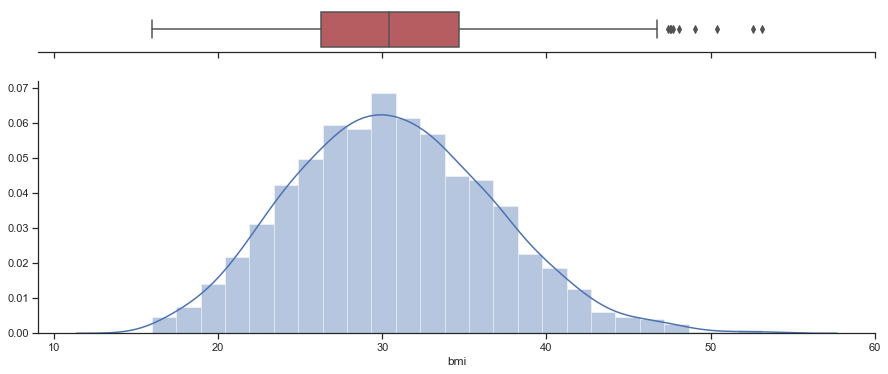

In [8]:
distribusi("bmi",datainsurance)

Kolom age skewnessnya sebesar 0.05567251565299186.


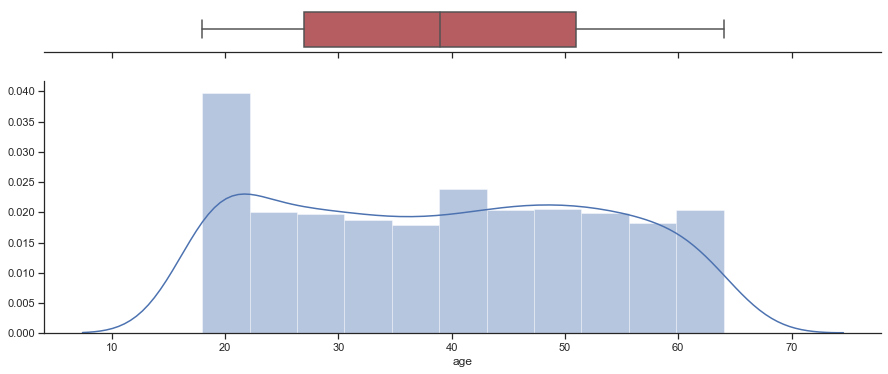

In [9]:
distribusi("age",datainsurance)

Kolom children skewnessnya sebesar 0.9383804401702414.


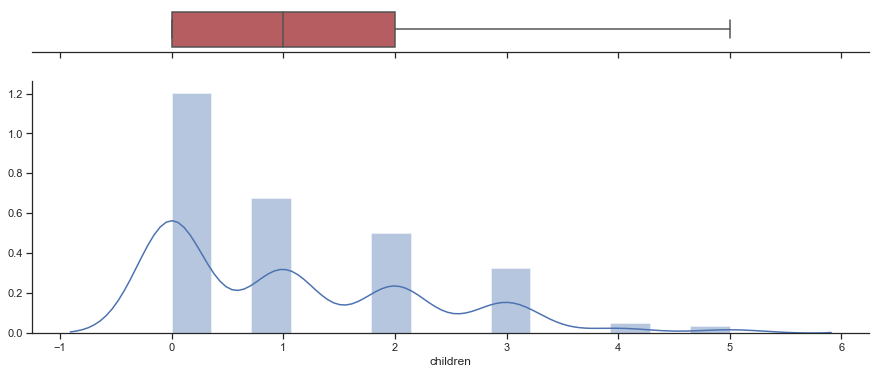

In [10]:
distribusi("children",datainsurance)

Kolom charges skewnessnya sebesar 1.5158796580240388.


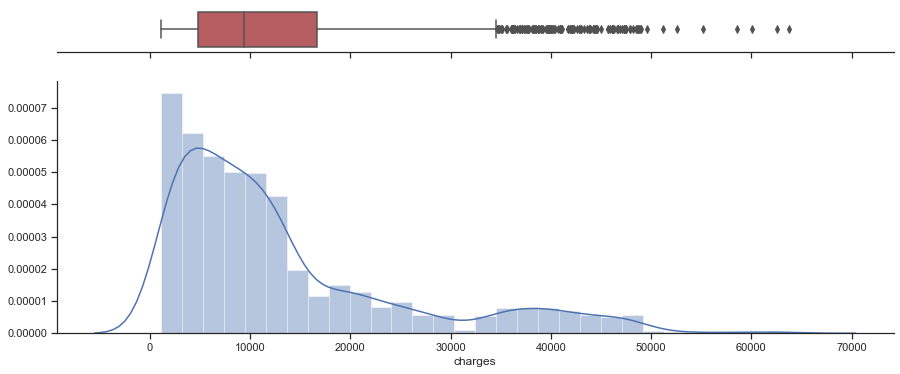

In [11]:
distribusi("charges",datainsurance)

<h2>g. Mengetahui Outlier dari Data</h2>
<h5>For the outlier we can see from previous poin, as we can see from the Box Plot</h5>

But, if we want to know the IQR and The Minimum and Maximum Value, we can use this

In [36]:
age=sorted(datainsurance.loc[:,"age"])#sorting age column
bmi=sorted(datainsurance.loc[:,"bmi"])#sorting bmi column
children=sorted(datainsurance.loc[:,"children"])#sorting children column
charges=sorted(datainsurance.loc[:,"charges"])#sorting charges column
q1age,q3age=np.percentile(age,[25,75])#finding q1 and q3 values of age column
q1bmi,q3bmi=np.percentile(bmi,[25,75])#finding q1 and q3 values of bmi column
q1children,q3children=np.percentile(children,[25,75])#finding q1 and q3 values of children column
q1charges,q3charges=np.percentile(charges,[25,75])#finding q1 and q3 values of charges column
iqrage=q3age-q1age                     #finding iqr values of age column
iqrbmi=q3bmi-q1bmi                     #finding iqr values of bmi column
iqrchildren=q3children-q1children      #finding iqr values of children column
iqrcharges=q3charges-q1charges         #finding iqr values of charges column

In [30]:
print("Minimum and Maximum value at Age are "+str(q1age-(iqrage*1.5))+" and "+str(q3age+(1.5*iqrage))+", so the outliers above 87.0")
print("Minimum and Maximum value at BMI are "+str(q1bmi-(iqrbmi*1.5))+" and "+str(q3bmi+(1.5*iqrbmi))+", so the outliers below 13.7 and above 47.3")
print("Minimum and Maximum value at Children are "+str(q1children-(iqrchildren*1.5))+" and "+str(q3children+(1.5*iqrchildren))+", so the outliers above 5.0")
print("Minimum and Maximum value at Charges are "+str(q1charges-(iqrcharges*1.5))+" and "+str(q3charges+(1.5*iqrcharges))+", so the outliers above 34489.4")

Minimum and Maximum value at Age are -9.0 and 87.0, so the outliers above 87.0
Minimum and Maximum value at BMI are 13.7 and 47.290000000000006, so the outliers below 13.7 and above 47.3
Minimum and Maximum value at Children are -3.0 and 5.0, so the outliers above 5.0
Minimum and Maximum value at Charges are -13109.1508975 and 34489.350562499996, so the outliers above 34489.4


<h1>Nomor 2</h1>

In [14]:
from scipy.stats import mannwhitneyu
from scipy.stats import kstest
from scipy.stats import ttest_ind

In [15]:
smoker=datainsurance[datainsurance.loc[:,"smoker"]=="yes"].charges
nonsmoker=datainsurance[datainsurance.loc[:,"smoker"]=="no"].charges

In [16]:
testsmoker=kstest(smoker, 'norm', args=(smoker.mean(),smoker.std()))
testnonsmoker=kstest(nonsmoker, 'norm', args=(nonsmoker.mean(),nonsmoker.std()))
print(testsmoker)
print(testnonsmoker)

KstestResult(statistic=0.12135574013148259, pvalue=0.0005650280349912631)
KstestResult(statistic=0.11123305162291003, pvalue=6.379515833221052e-12)


DThe Data is not Normal Distribution, so we must check the skewness

In [17]:
smokerdata=datainsurance[datainsurance.loc[:,"smoker"]=="yes"]
nonsmokerdata=datainsurance[datainsurance.loc[:,"smoker"]=="no"]

Kolom charges skewnessnya sebesar 0.12821727537875743.


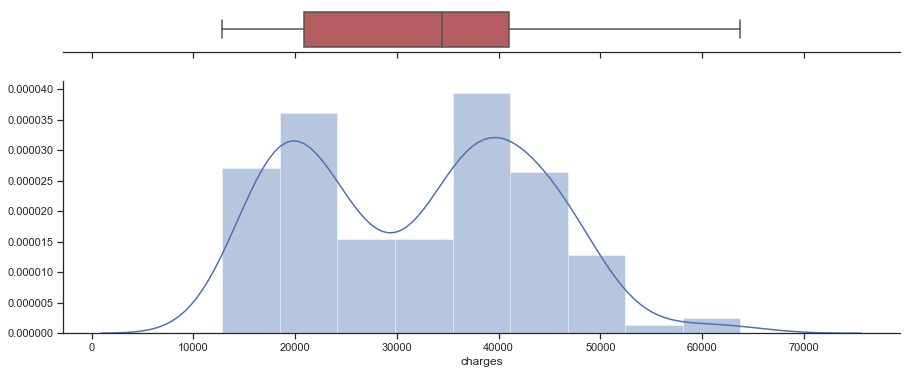

In [18]:
distribusi("charges",smokerdata) #show the distribution function of smoker

Kolom charges skewnessnya sebesar 1.5381200362088077.


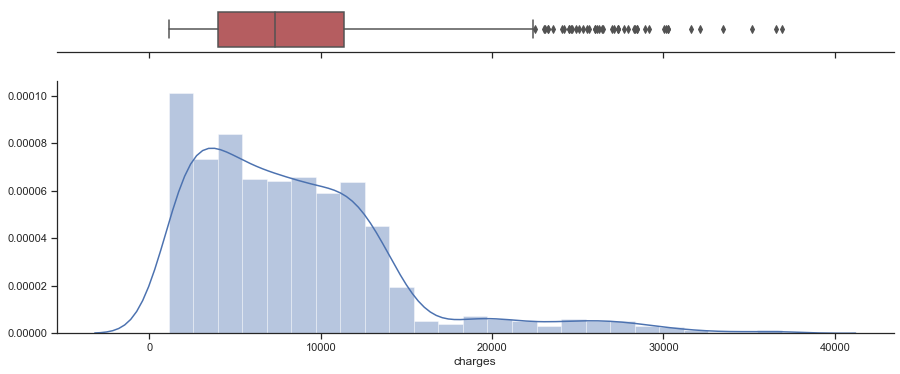

In [19]:
distribusi("charges",nonsmokerdata) #show the distribution function of non smoker

Using Mannwhitneyu

In [20]:
stat_ttest, p_ttest = ttest_ind(smoker,nonsmoker)
stat_mann, p_mann = mannwhitneyu(smoker,nonsmoker)

In [37]:
TestResult = pd.DataFrame(index=["Ttest","Mannwhitneyu"],
                         columns=["Result Statistics","Result P_Value"],
                          data=[[stat_ttest, p_ttest],[stat_mann, p_mann]])
TestResult

,Result Statistics,Result P_Value
Ttest,46.664921,8.271436e-283
Mannwhitneyu,7403.000000,2.635117e-130


This is the result that i got from the test above